In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns=["customerID"], inplace=True,axis=1)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values      

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [13]:
df.shape

(7043, 20)

In [14]:
df1 = df[df.TotalCharges != " "  ]
df1.shape

(7032, 20)

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [21]:
tenure_churn_no = df1[df.Churn == "No"].tenure
tenure_churn_yes = df1[df.Churn == "Yes"].tenure

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\3129810872.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_no = df1[df.Churn == "No"].tenure
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\3129810872.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_yes = df1[df.Churn == "Yes"].tenure


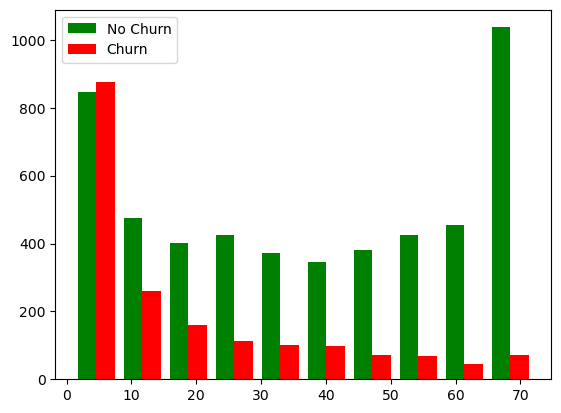

In [23]:
plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'], label=['No Churn', 'Churn'])
plt.legend()

In [28]:
def print_unique_values(df):
    for column in df:
        print(f"{column}: {df[column].unique()}")

In [26]:
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\2050252930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\2050252930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace=True)


In [29]:
print_unique_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [44]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [45]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [46]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [47]:
print_unique_values(df1)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [48]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [49]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3026,1,0,1,0,16,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
5658,0,0,1,0,24,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
5462,0,0,1,0,64,1,1,0,1,0,...,True,False,False,False,True,False,False,False,False,True
4943,1,0,1,0,71,1,0,1,1,1,...,True,False,False,False,False,True,False,True,False,False
151,0,0,0,0,7,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [50]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [51]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [52]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3181,1,0,1,0,0.887324,1,1,1,1,1,...,True,False,False,False,False,True,False,False,False,True
3505,0,0,0,0,0.112676,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
2306,1,0,0,0,0.028169,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3538,0,0,1,1,0.985915,1,0,1,1,1,...,False,True,False,False,False,True,False,True,False,False
3576,1,0,1,1,1.000000,1,1,0,0,0,...,False,False,True,False,True,False,True,False,False,False


In [59]:
yes_no_columns = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No',
                  'Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
for col in yes_no_columns:
    df2[col].replace({'True': 1,'False': 0},inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14236\708741297.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace({'True': 1,'False': 0},inplace=True)


In [60]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3471,1,0,0,0,0.478873,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
1922,0,0,1,1,0.338028,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3663,1,0,0,0,0.112676,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
788,1,0,1,1,0.323944,1,1,1,1,0,...,True,False,False,False,True,False,False,False,True,False
2148,0,0,0,1,0.070423,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [55]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')
    

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [58]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2549,0,0,0,0,0.014085,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
6428,1,0,0,0,0.070423,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
1869,0,0,1,1,1.000000,1,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
1793,0,0,1,1,1.000000,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False
5583,1,1,1,0,0.352113,1,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False


In [62]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)    


In [66]:
X_train.shape

(5625, 26)

In [67]:
X_test.shape

(1407, 26)

In [68]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping



model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Users\ADMIN\.conda\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.7298 - loss: 0.5278
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.7972 - loss: 0.4273
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8039 - loss: 0.4192
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8023 - loss: 0.4161
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8043 - loss: 0.4137
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4111
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8092 - loss: 0.4103
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8098 - loss: 0.4084
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8078 - loss: 0.4071
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8085 - loss: 0.4065
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8103 - loss: 0.4056
Epoch 12/100
176/176 ━━━━━━━━━━━━

In [94]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7719 - loss: 0.4942 


[0.49418357014656067, 0.7718549966812134]

In [104]:
y_pred = model.predict(X_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step


In [105]:
y_pred[:5]

array([[0.14141455],
       [0.43109432],
       [0.00093141],
       [0.7427175 ],
       [0.3820272 ]], dtype=float32)

In [107]:
y_predicted = []
for element in y_pred:
    if element >= 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [78]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [113]:
from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       999
           1       0.68      0.40      0.51       408

    accuracy                           0.77      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.76      0.77      0.75      1407

